## German Credit risk Analysis

## Overview

The project objective, is to predict if the person will pay or not his debt

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data, and removing useless column

In [130]:
credit_data = pd.read_csv('../datasets/german_credit_data.csv')

In [131]:
credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [132]:
credit_data.drop(columns='Unnamed: 0', inplace=True)

In [133]:
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Looking some statistics, NaN values, and data types

In [134]:
credit_data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [135]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


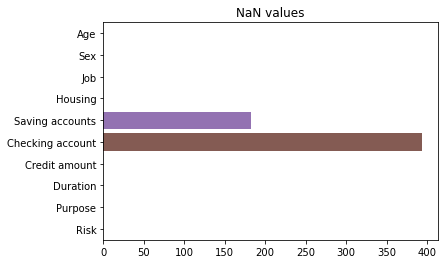

In [136]:
plt.title('NaN values')
sns.barplot(x=credit_data.isna().sum(), y=credit_data.columns);

## Cleaning NaN values, creating Age and Credit amount rounded, and changing Job type to object.

In [137]:
credit_data['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [138]:
credit_data['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [139]:
# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

credit_data.Job = credit_data.Job.map({0:'unskilled_nr', 1:'unskilled_r', 2:'skilled', 3:'highly_skilled'})

In [140]:
credit_data['Credit_Amount_Rounded'] = np.round(credit_data['Credit amount'], -3)

In [141]:
crosstab_table = pd.crosstab(index=credit_data['Credit_Amount_Rounded'], columns=credit_data['Risk'])

print(crosstab_table)

Risk                   bad  good
Credit_Amount_Rounded           
0                        3    15
1000                    85   203
2000                    59   172
3000                    38   111
4000                    26    72
5000                    17    31
6000                    14    30
7000                    14    24
8000                    12    15
9000                     5     9
10000                    5     6
11000                    3     4
12000                    6     3
13000                    4     1
14000                    3     2
15000                    3     0
16000                    2     2
18000                    1     0


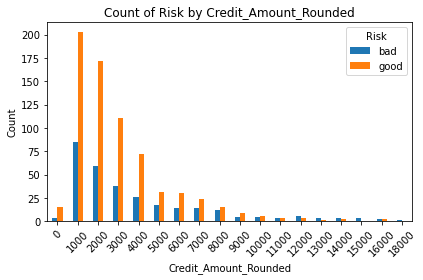

In [142]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Credit_Amount_Rounded')
plt.xlabel('Credit_Amount_Rounded')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [143]:
credit_data['Age_Rounded'] = np.round(credit_data['Age'], -1)
crosstab_table = pd.crosstab(index=credit_data['Age_Rounded'], columns=credit_data['Risk'])

print(crosstab_table)

Risk         bad  good
Age_Rounded           
20            80   110
30           112   246
40            61   205
50            25    82
60            17    44
70             5    11
80             0     2


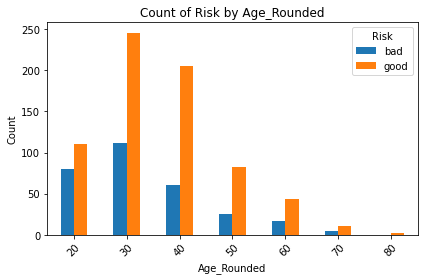

In [144]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Age_Rounded')
plt.xlabel('Age_Rounded')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

It is possible to guess that NaN is the person that have no Checking/Saving accounts.

I will fill it as "None".

In [145]:
credit_data['Checking account'].fillna(value='None', inplace=True)

In [146]:
credit_data['Saving accounts'].fillna(value='None', inplace=True)

In [147]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    1000 non-null   int64 
 1   Sex                    1000 non-null   object
 2   Job                    1000 non-null   object
 3   Housing                1000 non-null   object
 4   Saving accounts        1000 non-null   object
 5   Checking account       1000 non-null   object
 6   Credit amount          1000 non-null   int64 
 7   Duration               1000 non-null   int64 
 8   Purpose                1000 non-null   object
 9   Risk                   1000 non-null   object
 10  Credit_Amount_Rounded  1000 non-null   int64 
 11  Age_Rounded            1000 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 93.9+ KB


## Looking for correlated variables

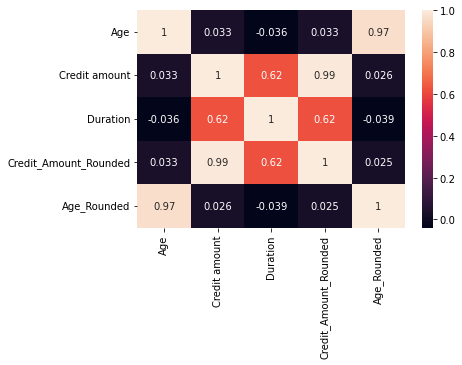

In [148]:
sns.heatmap(data=credit_data.corr(), annot=True);

Credit amount and Job are a little correlated, Duration and Job are a little correlated, and Duration is very correlated with Credit amount.

## Looking for variables distributions

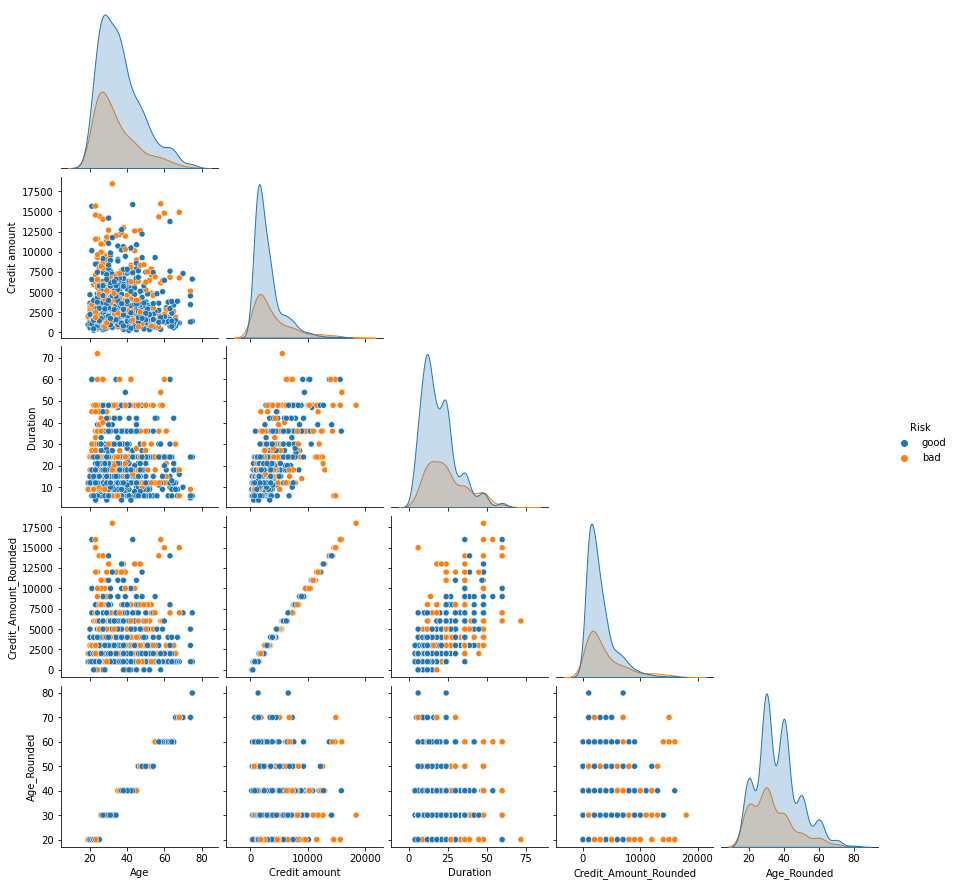

In [149]:
sns.pairplot(credit_data, corner=True, hue='Risk');

Looks like Credit amount with Duration have linear distribution

## Verifying histograms

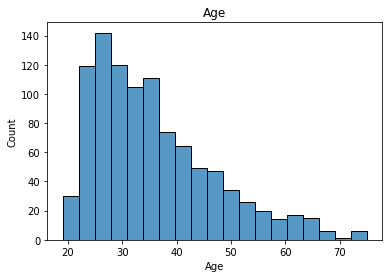

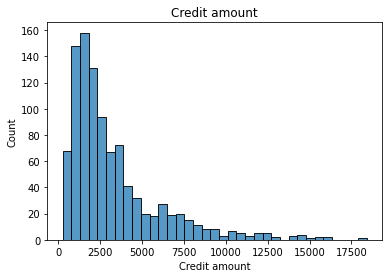

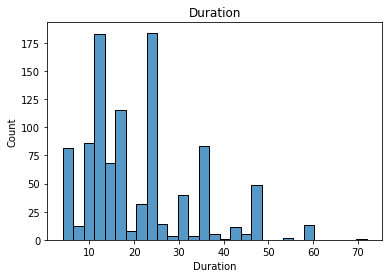

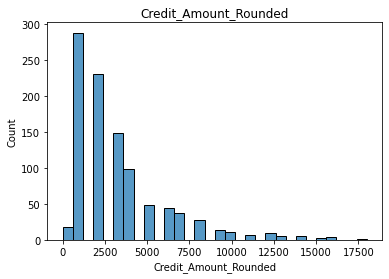

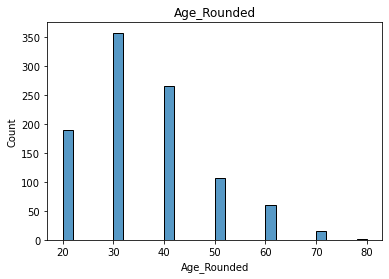

In [150]:
data_num = credit_data.select_dtypes(include='number')
data_cat = credit_data.select_dtypes(exclude='number')
for i in data_num.columns:
    sns.histplot(data_num[i])
    plt.title(i)
    plt.show()

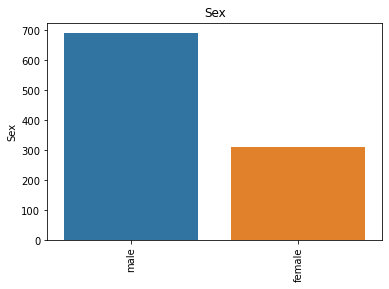

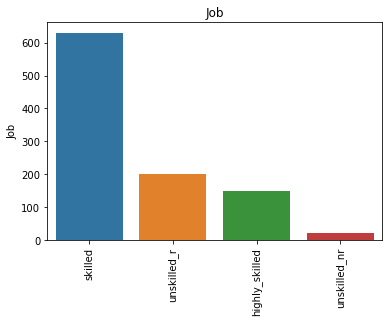

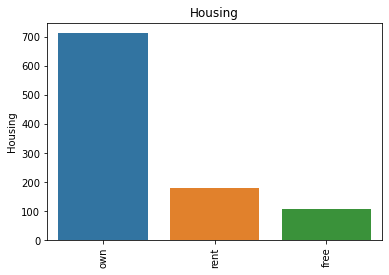

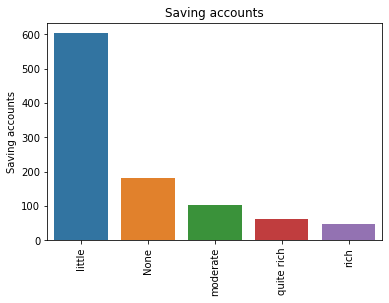

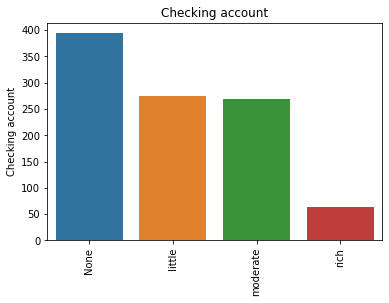

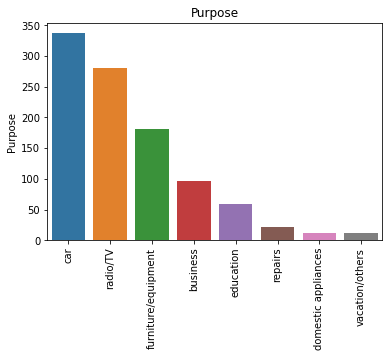

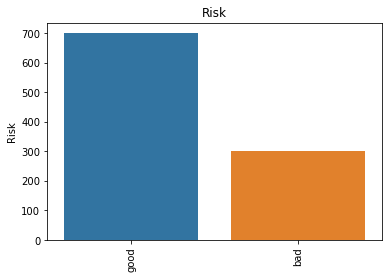

In [151]:
for i in data_cat.columns:
    sns.barplot(x=data_cat[i].value_counts().index,y=data_cat[i].value_counts()).set_title(i)
    plt.xticks(rotation=90)
    plt.show()

## The dataset is very unbalanced between classes and number value ranges

## Starting to do some EDA

In [152]:
crosstab_table = pd.crosstab(index=credit_data['Purpose'], columns=credit_data['Risk'])

print(crosstab_table)

Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


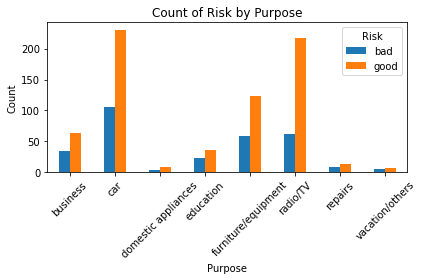

In [153]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()

plt.show()

In [154]:
crosstab_table = pd.crosstab(index=credit_data['Housing'], columns=credit_data['Risk'])
print(crosstab_table)

Risk     bad  good
Housing           
free      44    64
own      186   527
rent      70   109


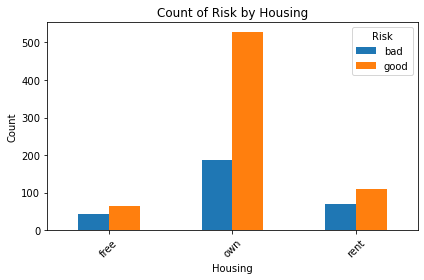

In [155]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()

plt.show()

## People who owns housing have less credit risk

In [156]:
crosstab_table = pd.crosstab(index=credit_data['Sex'], columns=credit_data['Risk'])
print(crosstab_table)

Risk    bad  good
Sex              
female  109   201
male    191   499


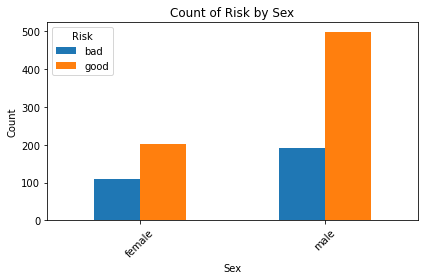

In [157]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()

plt.show()

## Male has less credit risk

In [158]:
crosstab_table = pd.crosstab(index=credit_data['Checking account'], columns=credit_data['Risk'])
print(crosstab_table)

Risk              bad  good
Checking account           
None               46   348
little            135   139
moderate          105   164
rich               14    49


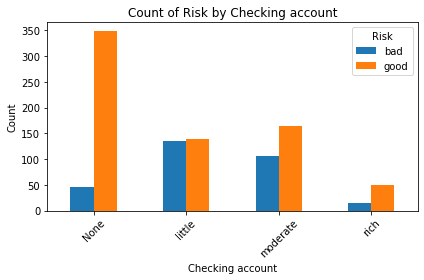

In [159]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Checking account')
plt.xlabel('Checking account')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()

plt.show()

## People who have no checking acount, and rich have less credit risk

In [160]:
crosstab_table = pd.crosstab(index=credit_data['Saving accounts'], columns=credit_data['Risk'])
print(crosstab_table)

Risk             bad  good
Saving accounts           
None              32   151
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


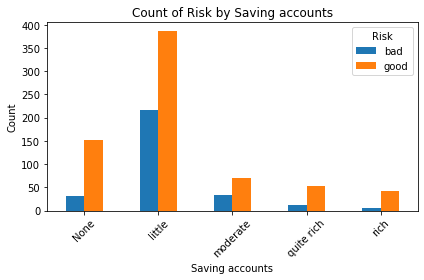

In [161]:
crosstab_table.plot(kind='bar', stacked=False)
plt.title('Count of Risk by Saving accounts')
plt.xlabel('Saving accounts')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()

plt.show()

## People who have no saving acount, quite rich and rich have less credit risk

## Baseline model using, Random Forest and SVC, because data is unbalanced

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [166]:
x = credit_data.drop(columns=['Risk','Age','Credit amount'])
x

,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose,Credit_Amount_Rounded,Age_Rounded
0,male,skilled,own,None,little,6,radio/TV,1000,70
1,female,skilled,own,little,moderate,48,radio/TV,6000,20
2,male,unskilled_r,own,little,None,12,education,2000,50
3,male,skilled,free,little,little,42,furniture/equipment,8000,40
4,male,skilled,free,little,little,24,car,5000,50
...,...,...,...,...,...,...,...,...,...
995,female,unskilled_r,own,little,None,12,furniture/equipment,2000,30
996,male,highly_skilled,own,little,little,30,car,4000,40
997,male,skilled,own,little,None,12,radio/TV,1000,40
998,male,skilled,free,little,little,45,radio/TV,2000,20


In [169]:
y = credit_data.Risk
y = y.map({'good': 1, 'bad': 0})


In [172]:
x = pd.get_dummies(x)

In [173]:
x

,Duration,Credit_Amount_Rounded,Age_Rounded,Sex_female,Sex_male,Job_highly_skilled,Job_skilled,Job_unskilled_nr,Job_unskilled_r,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,6,1000,70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,48,6000,20,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,12,2000,50,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,42,8000,40,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,24,5000,50,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,2000,30,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
996,30,4000,40,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
997,12,1000,40,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
998,45,2000,20,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [178]:
model_svc = Pipeline([('std_scaler', StandardScaler()),
                      ('model', SVC())])

In [179]:
model_svc.fit(x_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('model', SVC())])

In [180]:
y_hat_svc = model_svc.predict(x_test)

In [181]:
print(classification_report(y_test,y_hat_svc))

              precision    recall  f1-score   support

           0       0.63      0.30      0.40        91
           1       0.75      0.92      0.83       209

    accuracy                           0.73       300
   macro avg       0.69      0.61      0.62       300
weighted avg       0.71      0.73      0.70       300



In [182]:
model_rf = Pipeline([('std_scaler', StandardScaler()),
                      ('model', RandomForestClassifier())])

In [183]:
model_rf.fit(x_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [184]:
model_rf.fit(x_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [185]:
y_hat_rf = model_rf.predict(x_test)

In [186]:
print(classification_report(y_test,y_hat_rf))

              precision    recall  f1-score   support

           0       0.55      0.38      0.45        91
           1       0.76      0.86      0.81       209

    accuracy                           0.72       300
   macro avg       0.65      0.62      0.63       300
weighted avg       0.70      0.72      0.70       300

